In [64]:
%run header.py data/ASIC-2-FPGA

Python version: 3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.20.1
matplotlib version: 2.0.2
NumPy version: 1.14.1
SciPy version: 1.0.0
IPython version: 5.3.0
scikit-learn version: 0.19.1
-------------------------


In [3]:
# Load exhaustive training results
es_v4_lr = pd.read_csv('es_v4_lr.csv')
es_v4_ada = pd.read_csv('es_v4_ada.csv')
es_v4_rf = pd.read_csv('es_v4_rf.csv')

# direct mapping
dm_v4 = pd.read_csv('direct_mapping_v4.csv')
dm_v5 = pd.read_csv('direct_mapping_v5.csv')

# direct mapping with tolerance
dm_v4_01 = pd.read_csv('direct_mapping_v4_tolerance_0.1.csv')
dm_v5_01 = pd.read_csv('direct_mapping_v5_tolerance_0.1.csv')
dm_v4_005 = pd.read_csv('direct_mapping_v4_tolerance_0.05.csv')
dm_v5_005 = pd.read_csv('direct_mapping_v5_tolerance_0.05.csv')

In [12]:
benchmark = 'interpolation'

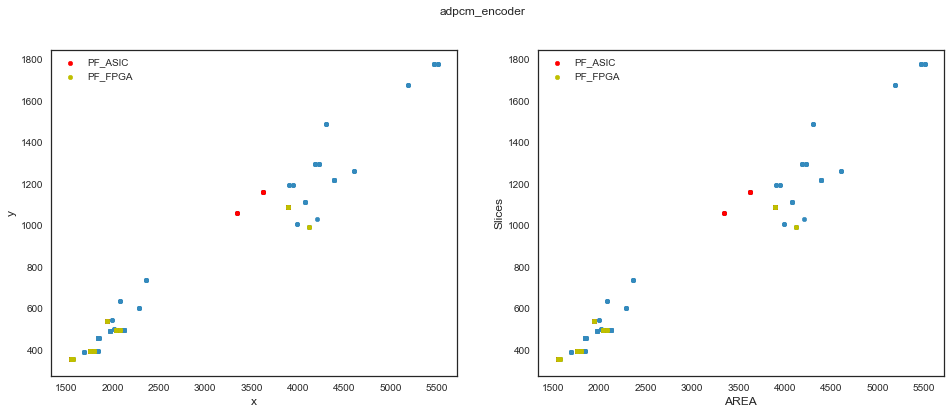

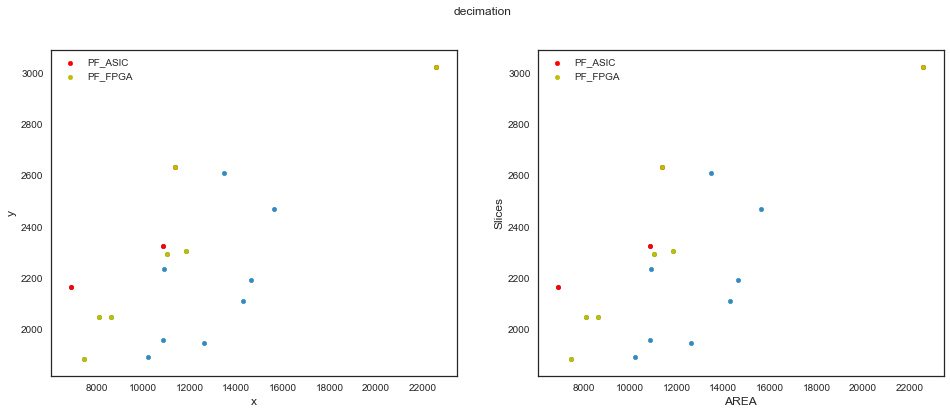

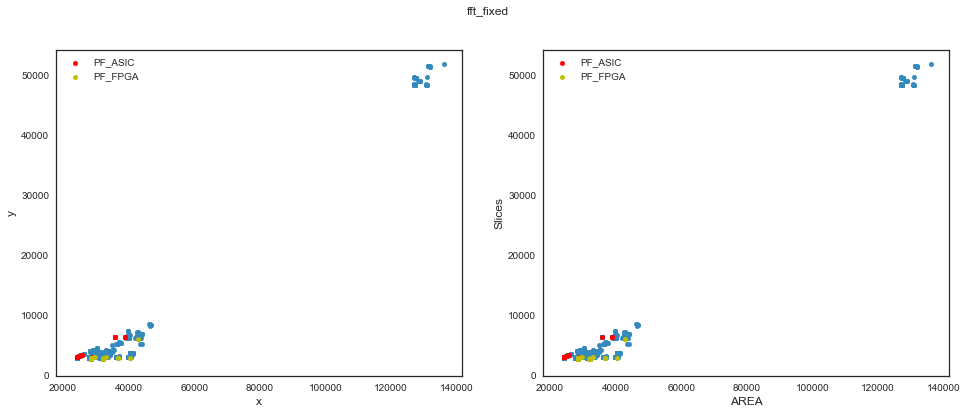

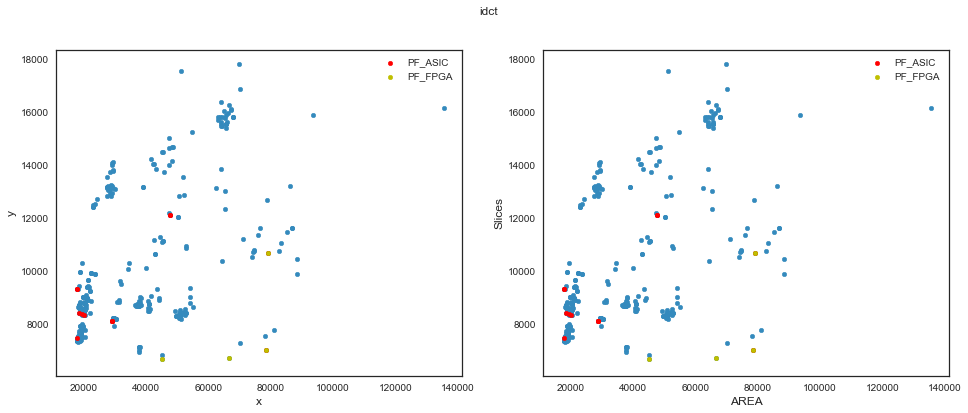

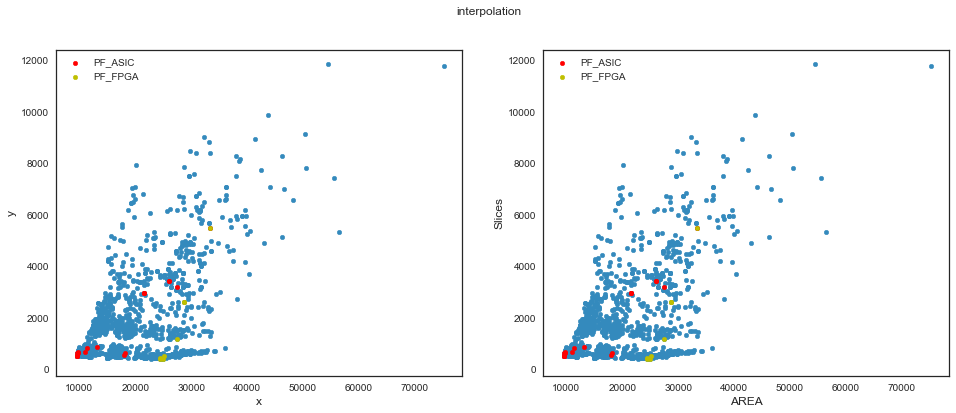

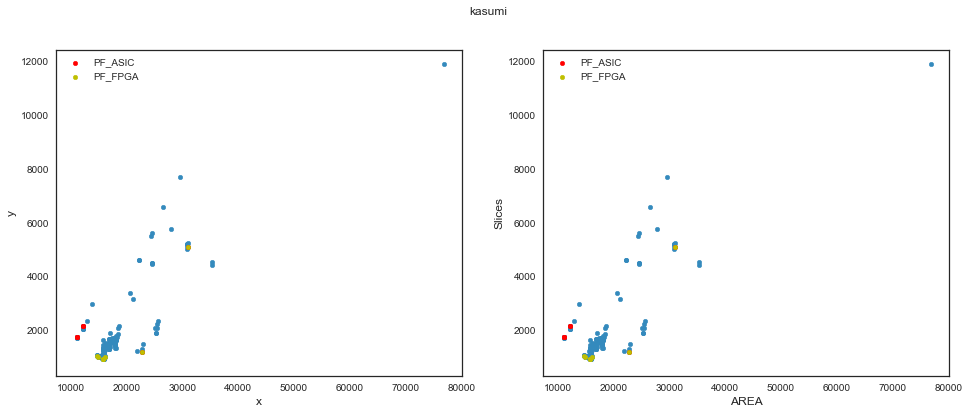

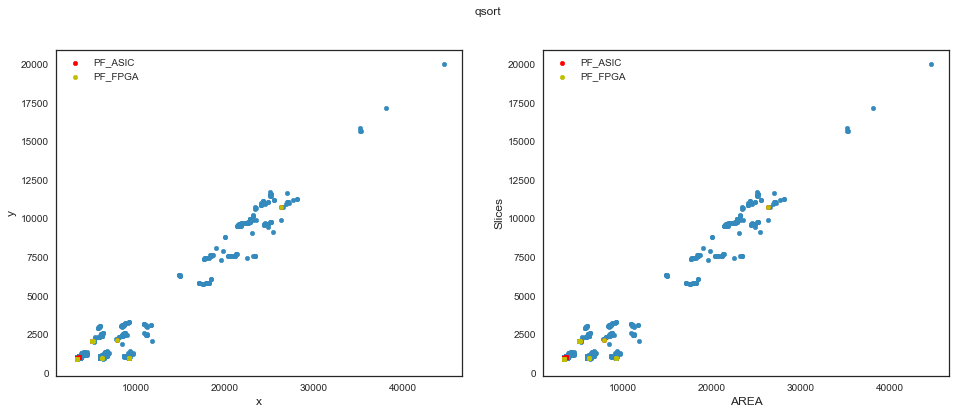

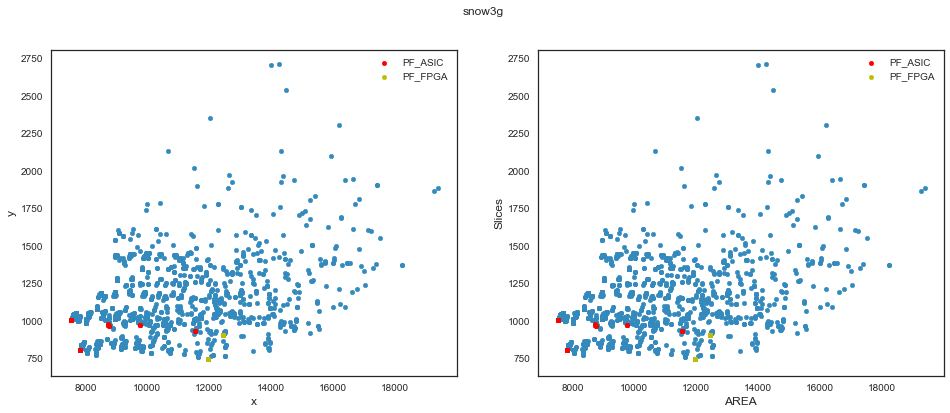

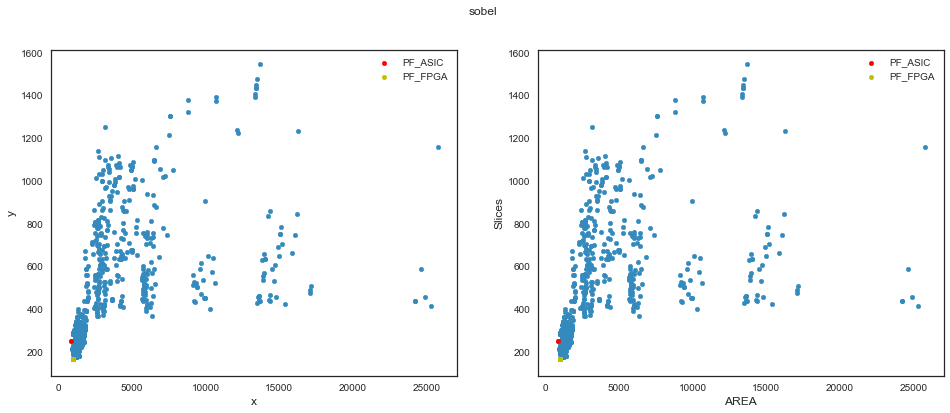

In [14]:
for benchmark in benchmarks:
    pca_plot(gd.data_v4[benchmark], title=benchmark, predictors=['AREA', 'Slices'])

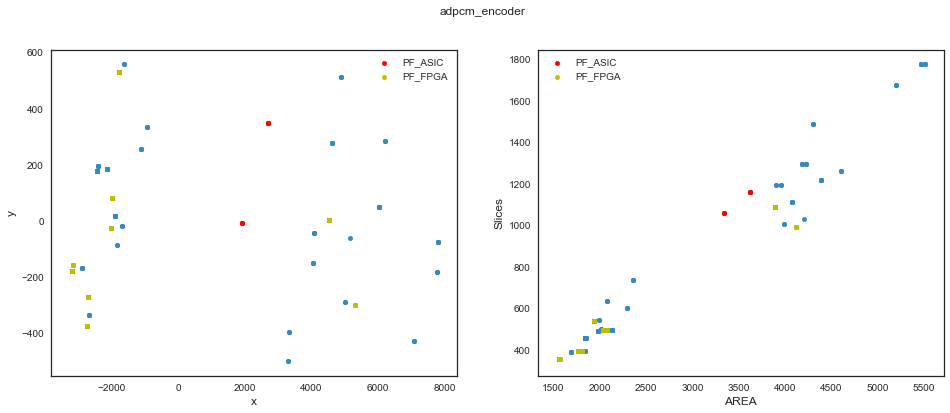

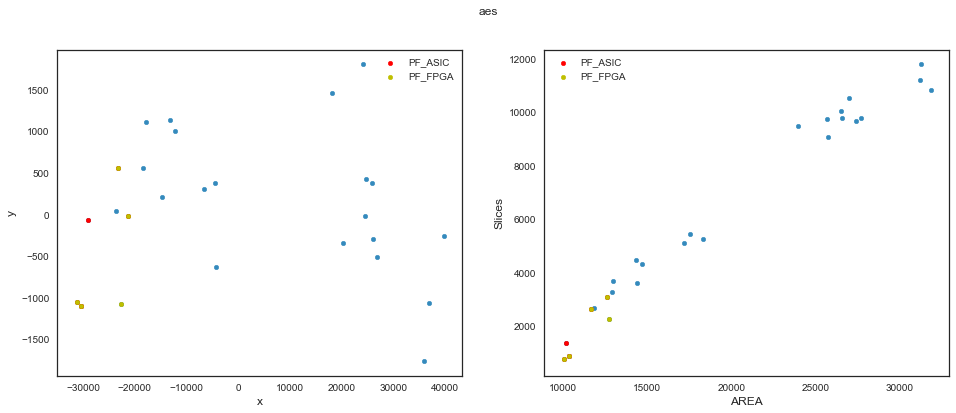

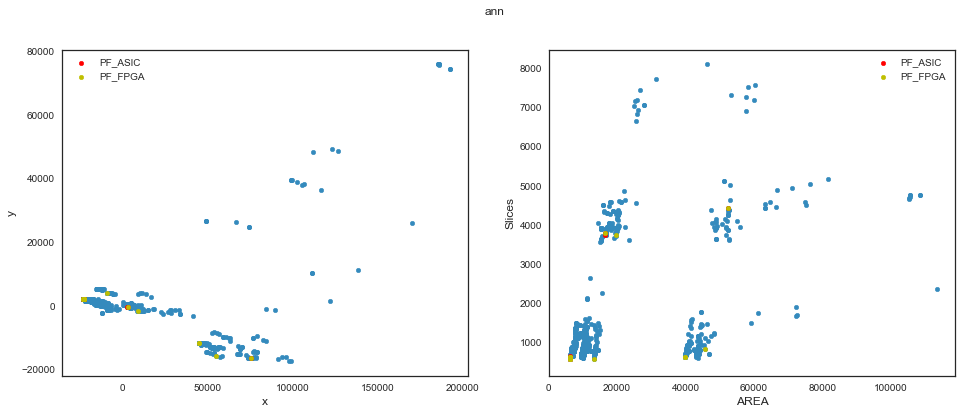

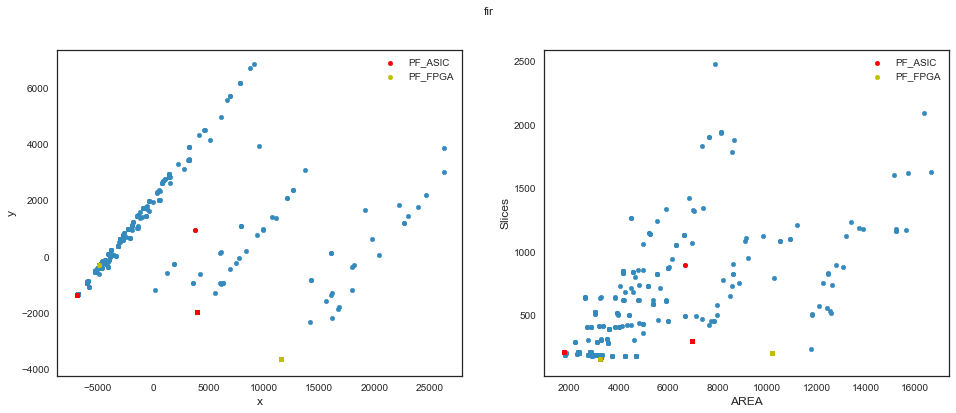

In [65]:
# select features and fix missing values
for benchmark in benchmarks:
    df = ML.fix_missing_data(gd.data_v4[benchmark])
    pca_plot(df, title=benchmark, predictors=valid_features)

In [15]:
es = es_v4_lr.copy()

In [50]:
lin_bench = ['adpcm_encoder', 'aes', 'average', 'fft_fixed', 'qsort']
lin_set = es.loc[es.test.isin(lin_bench)].reset_index(drop=True)
lin_set.sample(5)

train           test  \
275                              fft_fixed;interpolation          qsort   
10315           aes;ann;idct;interpolation;kasumi;snow3g        average   
16017  ann;decimation;fir;interpolation;kasumi;qsort;...  adpcm_encoder   
6148                           aes;fir;idct;kasumi;sobel        average   
2501                            aes;fft_fixed;fir;kasumi          qsort   

       adrs_ave  adrs_max  adrs_ave_rms  adrs_max_rms  hypervolume  dominance  \
275      0.0423    0.1667        0.0128        0.0483       0.7848     0.4286   
10315    0.0000    0.0000        0.0000        0.0000       0.3539     1.0000   
16017    0.1763    0.5056        0.1762        0.5050       0.3163     0.3333   
6148     0.0000    0.0000        0.0000        0.0000       1.0000     1.0000   
2501     0.0009    0.0063        0.0010        0.0071       0.9669     0.8571   

       cardinality  
275           11.0  
10315          3.0  
16017          9.0  
6148           1.0  
2501          10.0

In [51]:
def belong_to(sub_set, root_set):
    """Check if every element in `sub_set` is in `root_set`."""
    all_in = False
    for i in sub_set:
        if i in root_set:
            all_in = True
        else:
            all_in = False
            break
    return all_in

In [52]:
lin_set['belong_to'] = lin_set.train.apply(lambda x: belong_to(x.split(';'), lin_bench))

In [53]:
# training and testing sets are from `lin_bench`
lin_set_valid = lin_set.loc[lin_set.belong_to].reset_index(drop=True)

In [54]:
lin_set_valid.drop(['belong_to'], axis=1, inplace=True)

In [57]:
lin_set_valid.sample(10)

train           test  adrs_ave  adrs_max  \
38                            aes;qsort  adpcm_encoder    0.0903    0.2809   
46                        average;qsort      fft_fixed    0.0790    0.1911   
44                        average;qsort  adpcm_encoder    0.0024    0.0141   
5                                   aes        average    0.0000    0.0000   
22                    adpcm_encoder;aes          qsort    0.0146    0.0730   
48                      fft_fixed;qsort            aes    0.0000    0.0000   
33                          aes;average      fft_fixed    0.0296    0.0656   
8                               average  adpcm_encoder    0.0835    0.3333   
69              average;fft_fixed;qsort            aes    0.0000    0.0000   
70  adpcm_encoder;aes;average;fft_fixed          qsort    0.0222    0.0730   

    adrs_ave_rms  adrs_max_rms  hypervolume  dominance  cardinality  
38        0.0902        0.2804       0.2720     0.5000          8.0  
46        0.0366        0.0997       0.8278     0.1667         10.0  
44        0.0024        0.0141       0.3882     0.8333         10.0  
5         0.0000        0.0000       1.0000     1.0000          1.0  
22        0.0147        0.0731       0.9378     0.5714          6.0  
48        0.0000        0.0000       1.0000     1.0000          5.0  
33        0.0258        0.0657       0.9460     0.3333          6.0  
8         0.0981        0.2687       0.3680     0.3333          5.0  
69        0.0000        0.0000       1.0000     1.0000          5.0  
70        0.0223        0.0731       0.8314     0.4286          8.0

In [58]:
dm_lin = dm_v4.loc[dm_v4.benchmark.isin(lin_bench)]
dm_lin

benchmark  adrs_ave  adrs_max  adrs_ave_rms  adrs_max_rms  \
0   adpcm_encoder    0.0251    0.0978        0.0261        0.0875   
1             aes    0.0043    0.0216        0.0319        0.1593   
3         average    0.0000    0.0000        0.0000        0.0000   
5       fft_fixed    0.0583    0.1154        0.0383        0.0856   
10          qsort    0.0306    0.1667        0.0026        0.0110   

    hypervolume  dominance  cardinality  
0        0.2722     0.6667          6.0  
1        0.9669     0.8000          6.0  
3        0.4526     1.0000          8.0  
5        0.7895     0.0000          8.0  
10       0.9441     0.7143          7.0

In [59]:
combos, benches = es_vs_dm(lin_set_valid, dm_lin)

In [60]:
for i, j in zip(combos, benches):
    print(i)
    print(j)
    print()

average;fft_fixed;qsort
['adpcm_encoder', 'aes']

adpcm_encoder;fft_fixed;qsort
['aes', 'average']

adpcm_encoder;aes;fft_fixed;qsort
['average']

fft_fixed;qsort
['adpcm_encoder', 'aes', 'average']



In [67]:
gd.data_v4['average'].head(1)

index  AREA  state   FU  REG  MUX  DEC  pin_pair  net  max  min  ave  MISC  \
0      0  1168      4  273  654  210   14      1953  890    4    4  4.0    17   

  MEM CP_delay sim Pmax Pmin Pave  Latency BlockMemoryBit DSP  FU.1   ATTR  \
0   0  2.048ns   -    -    -    -       16              -   -  -100  Cyber   

     ARRAY_1          LOOP_1          LOOP_2       FUNC_1  \
0  array=REG  unroll_times=0  unroll_times=0  func=inline   

                                                Attr  \
0  ATTR=Cyber;ARRAY_1=array=REG;LOOP_1=unroll_tim...   

                                         Attr_with_L  Slices  
0  ATTR=Cyber;ARRAY_1=array=REG;LOOP_1=unroll_tim...      87

In [68]:
gd.data_v4['fft_fixed'].head(1)

index   AREA  state     FU   REG   MUX  DEC  pin_pair    net  max  min  \
0      0  33561     12  24999  5172  3118   22     56207  25238   20   20   

    ave  MISC MEM   CP_delay sim Pmax Pmin Pave  Latency BlockMemoryBit DSP  \
0  20.0   250   -  10.2052ns   -    -    -    -       19              -   -   

   FU.1   ATTR    ARRAY_1    ARRAY_2            LOOP_1            LOOP_2  \
0     0  Cyber  array=RAM  array=REG  unroll_times=all  unroll_times=all   

             LOOP_3     LOOP_4            LOOP_5     LOOP_6     LOOP_7  \
0  unroll_times=all  folding=1  unroll_times=all  folding=1  folding=1   

                                                Attr  \
0  ATTR=Cyber;ARRAY_1=array=RAM;ARRAY_2=array=REG...   

                                         Attr_with_L  Slices  
0  ATTR=Cyber;ARRAY_1=array=RAM;ARRAY_2=array=REG...    3412

In [69]:
gd.data_v4['qsort'].head(1)

index  AREA  state   FU   REG   MUX  DEC  pin_pair   net  max  min   ave  \
0      0  8720     24  909  3576  4025   16     18602  6970   24   24  24.0   

   MISC MEM CP_delay sim Pmax Pmin Pave  Latency BlockMemoryBit DSP  FU.1  \
0   194   -  2.915ns   -    -    -    -       33              -   -  -100   

    ATTR                         ARRAY_1    ARRAY_2    ARRAY_3     LOOP_1  \
0  Cyber  array=EXPAND+array_index=const  array=REG  array=RAM  folding=1   

             LOOP_2            LOOP_3     LOOP_4            LOOP_5     LOOP_6  \
0  unroll_times=all  unroll_times=all  folding=0  unroll_times=all  folding=1   

        FUNC_1                                               Attr  \
0  func=inline  ATTR=Cyber;ARRAY_1=array=EXPAND+array_index=co...   

                                         Attr_with_L  Slices  
0  ATTR=Cyber;ARRAY_1=array=EXPAND+array_index=co...    2432

In [70]:
gd.data_v4['adpcm_encoder'].head(1)

index  AREA  state   FU  REG  MUX  DEC  pin_pair   net  max  min  ave  \
0      0  1846      4  977  636  203    0      3246  1505    4    4  4.0   

   MISC MEM  CP_delay sim Pmax Pmin Pave  Latency BlockMemoryBit DSP  FU.1  \
0    30   -  1.4275ns   -    -    -    -       21              -   -   100   

    ATTR    ARRAY_1     LOOP_1     FUNC_1       FUNC_2  \
0  Cyber  array=RAM  folding=1  func=goto  func=inline   

                                                Attr  \
0  ATTR=Cyber;ARRAY_1=array=RAM;LOOP_1=folding=1;...   

                                         Attr_with_L  Slices  
0  ATTR=Cyber;ARRAY_1=array=RAM;LOOP_1=folding=1;...     394

In [71]:
gd.data_v4['aes'].head(1)

index   AREA  state  FU   REG    MUX  DEC  pin_pair    net  max  min   ave  \
0      0  26968     46  94  5490  20055   40     67412  23295   60   60  60.0   

   MISC MEM  CP_delay sim Pmax Pmin Pave  Latency BlockMemoryBit DSP  FU.1  \
0  1289   -  1.4246ns   -    -    -    -     1442              -   -   100   

    ATTR    ARRAY_1  ...             LOOP_12           LOOP_13  \
0  Cyber  array=RAM  ...    unroll_times=all  unroll_times=all   

            LOOP_14    LOOP_15           LOOP_16    LOOP_17    LOOP_18  \
0  unroll_times=all  folding=1  unroll_times=all  folding=1  folding=1   

          LOOP_19    LOOP_20    LOOP_21    LOOP_22           LOOP_23  \
0  unroll_times=0  folding=0  folding=1  folding=0  unroll_times=all   

        FUNC_1       FUNC_2       FUNC_3     FUNC_4     FUNC_5     FUNC_6  \
0  func=inline  func=inline  func=inline  func=goto  func=goto  func=goto   

      FUNC_7       FUNC_8     FUNC_9      FUNC_10  \
0  func=goto  func=inline  func=goto  func=inline   

                                                Attr  \
0  ATTR=Cyber;ARRAY_1=array=RAM;ARRAY_2=array=RAM...   

                                         Attr_with_L Slices  
0  ATTR=Cyber;ARRAY_1=array=RAM;ARRAY_2=array=RAM...  10538  

[1 rows x 71 columns]

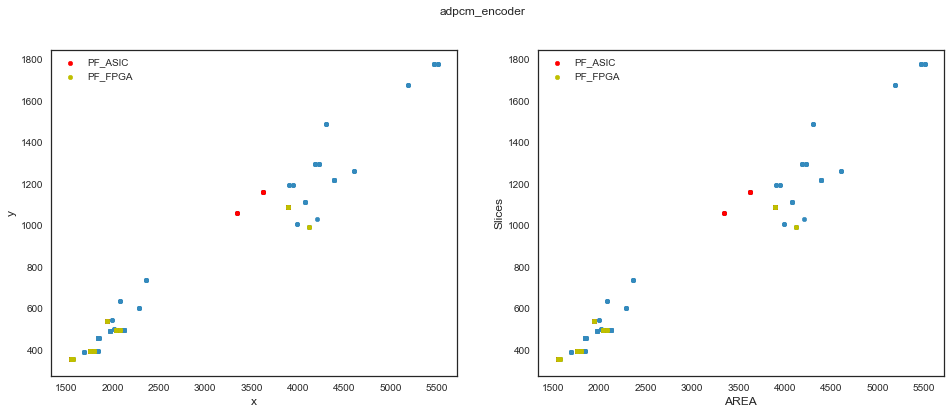

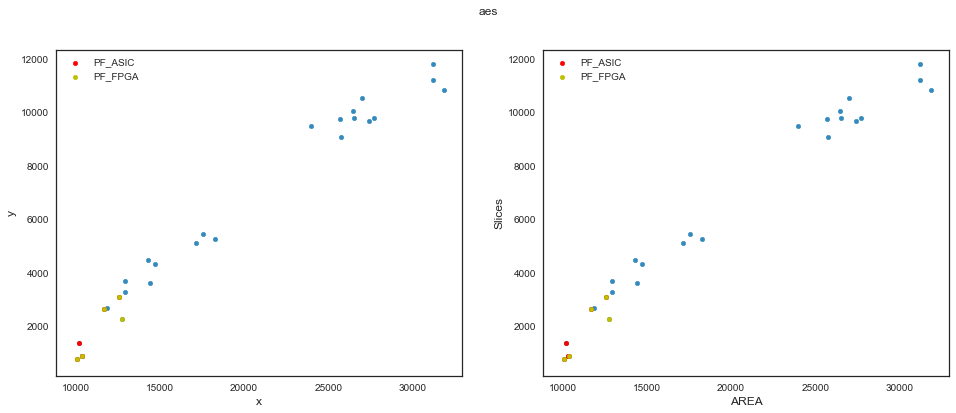

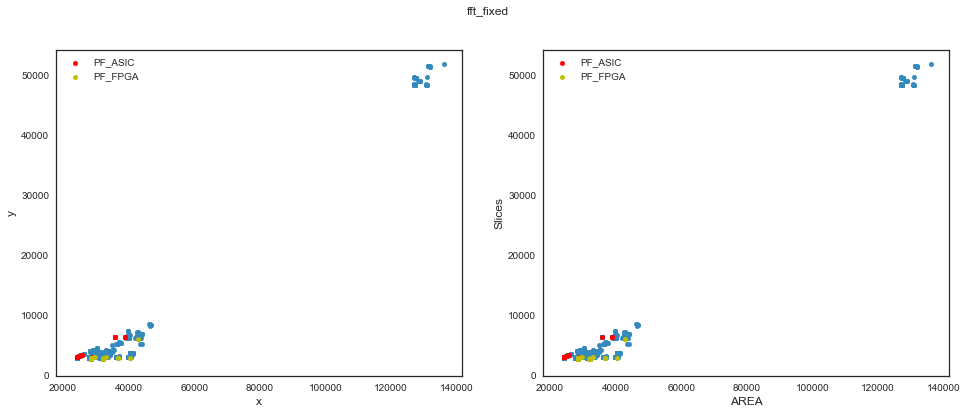

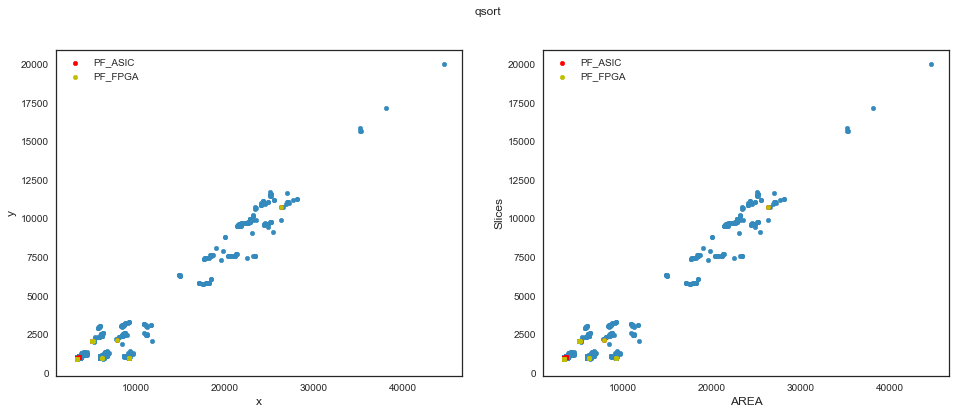

In [61]:
for benchmark in lin_bench:
    pca_plot(gd.data_v4[benchmark], title=benchmark, predictors=['AREA', 'Slices'])